In [3]:
import pandas as pd

### Link to kaggle dataset
<a href="https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows">IMDB dataset top 100 movies and tv shows</a>

### Column descriptions
**Poster_Link** - Link of the poster that imdb using\
**Series_Title** = Name of the movie\
**Released_Year** - Year at which that movie released\
**Certificate** - Certificate earned by that movie\
**Runtime** - Total runtime of the movie\
**Genre** - Genre of the movie\
**IMDB_Rating** - Rating of the movie at IMDB site\
**Overview** - mini story/ summary\
**Meta_score** - Score earned by the movie\
**Director** - Name of the Director\
**Star1**,Star2,Star3,Star4 - Name of the Stars\
**No_of_votes** - Total number of votes\
**Gross** - Money earned by that movie\

In [4]:
movie_df = pd.read_csv("imdb_top_1000.csv")
movie_df.dtypes

Poster_Link       object
Series_Title      object
Released_Year      int64
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

<Axes: title={'center': 'Average number of votes over time'}, xlabel='Released_Year'>

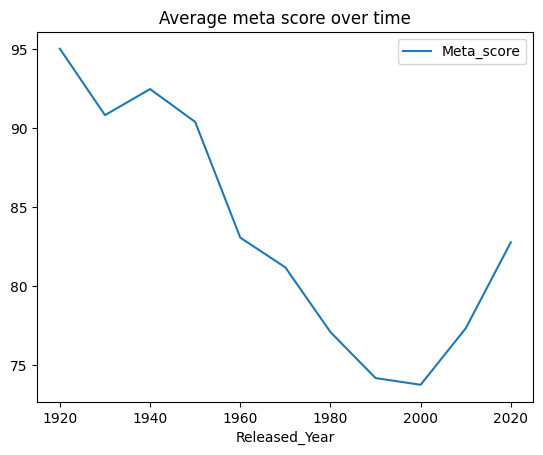

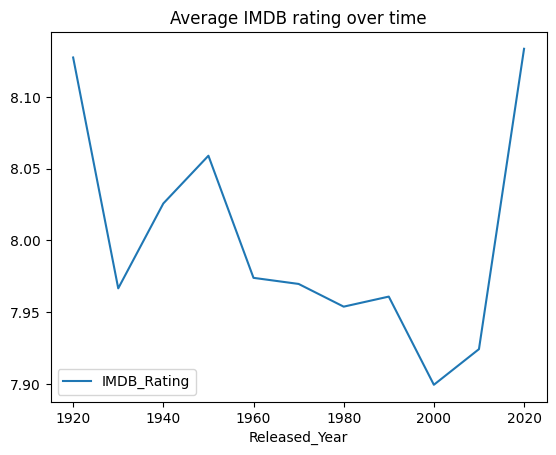

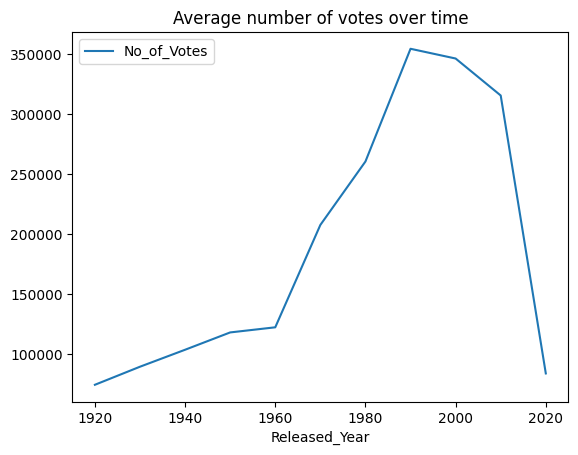

In [ ]:
# Genom att i vår gruppering köra en floor division så "konverterar" vi årtalen till deras respektive årtionden (1921//10 = 192, 192*10 =1920)
# som vi sedan kan gruppera och aggregera på. För att återställa index (då kompimerat värden) så kör vi en reset_index på slutet
group_by_decade = movie_df.groupby((movie_df["Released_Year"]//10)*10)[["Meta_score", "IMDB_Rating", "No_of_Votes"]].mean().reset_index()
group_by_decade.plot(kind="line", x="Released_Year", y="Meta_score", title="Average meta score over time")
group_by_decade.plot(kind="line", x="Released_Year", y="IMDB_Rating", title="Average IMDB rating over time")

group_by_decade.plot(kind="line", x="Released_Year", y="No_of_Votes", title="Average number of votes over time")

(70.0, 90.0)

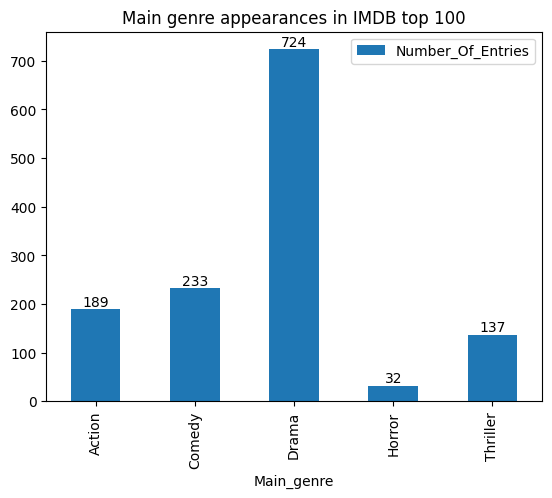

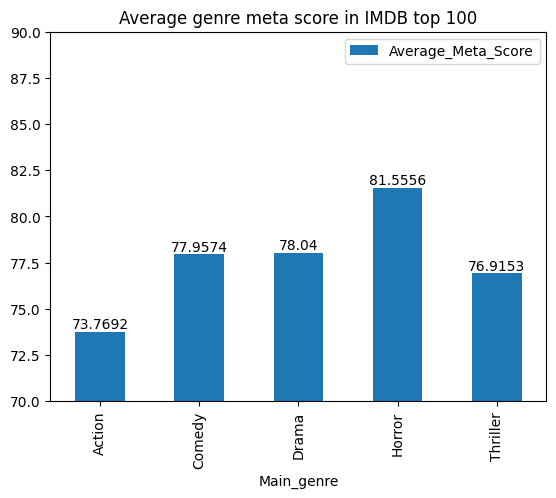

In [68]:
action_genre_entries_df = movie_df.loc[movie_df["Genre"].str.contains("Action")]
comedy_genre_entries_df = movie_df.loc[movie_df["Genre"].str.contains("Comedy")]
drama_genre_entries_df = movie_df.loc[movie_df["Genre"].str.contains("Drama")]
horror_genre_entries_df = movie_df.loc[movie_df["Genre"].str.contains("Horror")]
thriller_genre_entries_df = movie_df.loc[movie_df["Genre"].str.contains("Thriller")]

genre_comparisons = {
    "Main_genre": ["Action", "Comedy", "Drama", "Horror", "Thriller"],
    "Number_Of_Entries": [
        len(action_genre_entries_df), 
        len(comedy_genre_entries_df),
        len(drama_genre_entries_df),
        len(horror_genre_entries_df),
        len(thriller_genre_entries_df)
        ],
    "Average_Meta_Score":[
        action_genre_entries_df["Meta_score"].mean(),
        comedy_genre_entries_df["Meta_score"].mean(),
        drama_genre_entries_df["Meta_score"].mean(),
        horror_genre_entries_df["Meta_score"].mean(),
        thriller_genre_entries_df["Meta_score"].mean()
        ],
}

genre_df = pd.DataFrame(genre_comparisons).set_index("Main_genre")
plotA = genre_df.plot(kind="bar", y="Number_Of_Entries", title="Main genre appearances in IMDB top 100")
plotA.bar_label(plotA.containers[0], label_type="edge")
plotB = genre_df.plot(kind="bar", y="Average_Meta_Score", title="Average genre meta score in IMDB top 100")
plotB.bar_label(plotB.containers[0], label_type="edge")
plotB.set_ylim(70, 90)

In [ ]:

group_by_genre = movie_df.groupby(["Genre"])[["Meta_score", "IMDB_Rating"]].mean()
group_by_genre["has_meta_data"] =  True
group_by_genre.loc[group_by_genre["Meta_score"].isnull(), "has_meta_data"] = False
fixed_grouped_gernes = group_by_genre.loc[group_by_genre["has_meta_data"] == True]
